# Emotion Recognition Analyzer ML Model
Add initial plugins

In [13]:
!pip install seaborn
!pip install pydot

In [14]:
#importing important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

Download Dataset

In [15]:
# !wget "https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset/download?datasetVersionNumber=1"

Unzip Dataset

In [16]:
# !unzip EmotionRecognitionAnalyzerDataSet.zip

# Displaying Images


In [17]:
#taking inputs images for training
picture_size = 48
# folder_path = "/content/images/"
folder_path = "EmotionRecognitionAnalyzerDataSet/images/"

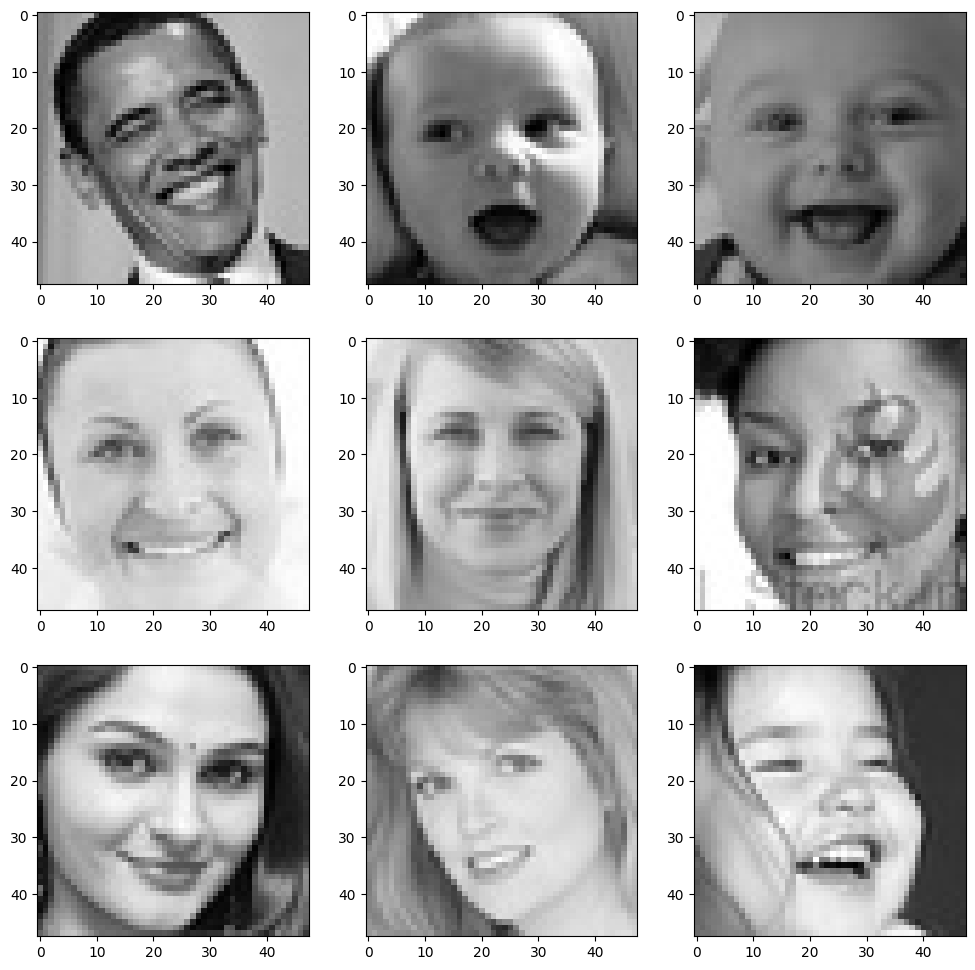

In [18]:
#checking disgust image
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

# Making Training and Validation Data


In [19]:
#splitting data into train, test and validation set
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building


* Model = sequential : A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

* Activation = relu :The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

* padding = The padding parameter of the Keras Conv2D class can take one of two values: 'valid' or 'same'.
Setting the value to “valid” parameter means that the input volume is not zero-padded and the spatial dimensions are allowed to reduce via the natural application of convolution.

* Maxpooling = Maximum pooling, or max pooling, is a pooling operation that calculates the maximum, or largest, value in each patch of each feature map. The results are down sampled or pooled feature maps that highlight the most present feature in the patch, not the average presence of the feature in the case of average pooling.

* Batch normalization = Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

* Dropout = Dropout is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.

* Adam = Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum.

* SGD = Stochastic Gradient Descent (SGD) addresses both of these issues by following the negative gradient of the objective after seeing only a single or a few training examples. The use of SGD In the neural network setting is motivated by the high cost of running back propagation over the full training set

* RMSprop = RMSprop is a gradient based optimization technique used in training neural networks. ... This normalization balances the step size (momentum), decreasing the step for large gradients to avoid exploding, and increasing the step for small gradients to avoid vanishing.

In [20]:
#building model with 7 classes
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

# Visualize model

The plot_model() function in Keras will create a plot of your network. This function takes a few useful arguments:

* model: (required) The model that you wish to plot.
* to_file: (required) The name of the file to which to save the plot.
* show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.
* show_layer_names: (optional, defaults to True) Whether or not to show the name for each lay

In [21]:
#visualizing the model
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Fitting the Model with Training and Validation Data


In [25]:
#importing tensorflow library and package
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#Stopping training when a monitored metric has stopped improving.
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [23]:
#fitting model with 48 epoch
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\Ashen Wijesingha\AppData\Local\Temp\ipykernel_26328\370370005.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/50
225/225 [==============================] - ETA: 0s - loss: 1.7816 - accuracy: 0.3142WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1143s 5s/step - loss: 1.7816 - accuracy: 0.3142 - val_loss: 1.7505 - val_accuracy: 0.3730 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - ETA: 0s - loss: 1.4371 - accuracy: 0.4515WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1157s 5s/step - loss: 1.4371 - accuracy: 0.4515 - val_loss: 1.5135 - val_accuracy: 0.4209 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - ETA: 0s - loss: 1.2874 - accuracy: 0.5066WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1300s 6s/step - loss: 1.2874 - accuracy: 0.5066 - val_loss: 1.2022 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - ETA: 0s - loss: 1.1882 - accuracy: 0.5477WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1086s 5s/step - loss: 1.1882 - accuracy: 0.5477 - val_loss: 1.1995 - val_accuracy: 0.5437 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - ETA: 0s - loss: 1.1252 - accuracy: 0.5697WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 979s 4s/step - loss: 1.1252 - accuracy: 0.5697 - val_loss: 1.3047 - val_accuracy: 0.5168 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - ETA: 0s - loss: 1.0782 - accuracy: 0.5902WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 949s 4s/step - loss: 1.0782 - accuracy: 0.5902 - val_loss: 1.1972 - val_accuracy: 0.5368 - lr: 0.0010
Epoch 7/50
225/225 [==============================] - ETA: 0s - loss: 1.0319 - accuracy: 0.6093WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 909s 4s/step - loss: 1.0319 - accuracy: 0.6093 - val_loss: 1.2632 - val_accuracy: 0.5180 - lr: 0.0010
Epoch 8/50
225/225 [==============================] - ETA: 0s - loss: 0.9963 - accuracy: 0.6219WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 956s 4s/step - loss: 0.9963 - accuracy: 0.6219 - val_loss: 1.0999 - val_accuracy: 0.5827 - lr: 0.0010
Epoch 9/50
225/225 [==============================] - ETA: 0s - loss: 0.9432 - accuracy: 0.6458WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 932s 4s/step - loss: 0.9432 - accuracy: 0.6458 - val_loss: 1.0930 - val_accuracy: 0.5832 - lr: 0.0010
Epoch 10/50
225/225 [==============================] - ETA: 0s - loss: 0.9070 - accuracy: 0.6591WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 915s 4s/step - loss: 0.9070 - accuracy: 0.6591 - val_loss: 1.1510 - val_accuracy: 0.5655 - lr: 0.0010
Epoch 11/50
225/225 [==============================] - ETA: 0s - loss: 0.8642 - accuracy: 0.6787WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 961s 4s/step - loss: 0.8642 - accuracy: 0.6787 - val_loss: 1.0527 - val_accuracy: 0.6107 - lr: 0.0010
Epoch 12/50
225/225 [==============================] - ETA: 0s - loss: 0.8207 - accuracy: 0.6888WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 937s 4s/step - loss: 0.8207 - accuracy: 0.6888 - val_loss: 1.0899 - val_accuracy: 0.6036 - lr: 0.0010
Epoch 13/50
225/225 [==============================] - ETA: 0s - loss: 0.7897 - accuracy: 0.7029WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 948s 4s/step - loss: 0.7897 - accuracy: 0.7029 - val_loss: 1.1240 - val_accuracy: 0.6028 - lr: 0.0010
Epoch 14/50
225/225 [==============================] - ETA: 0s - loss: 0.7398 - accuracy: 0.7193Restoring model weights from the end of the best epoch: 11.



Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 965s 4s/step - loss: 0.7398 - accuracy: 0.7193 - val_loss: 1.1066 - val_accuracy: 0.6183 - lr: 0.0010
Epoch 14: early stopping


# Plotting Accuracy & Loss


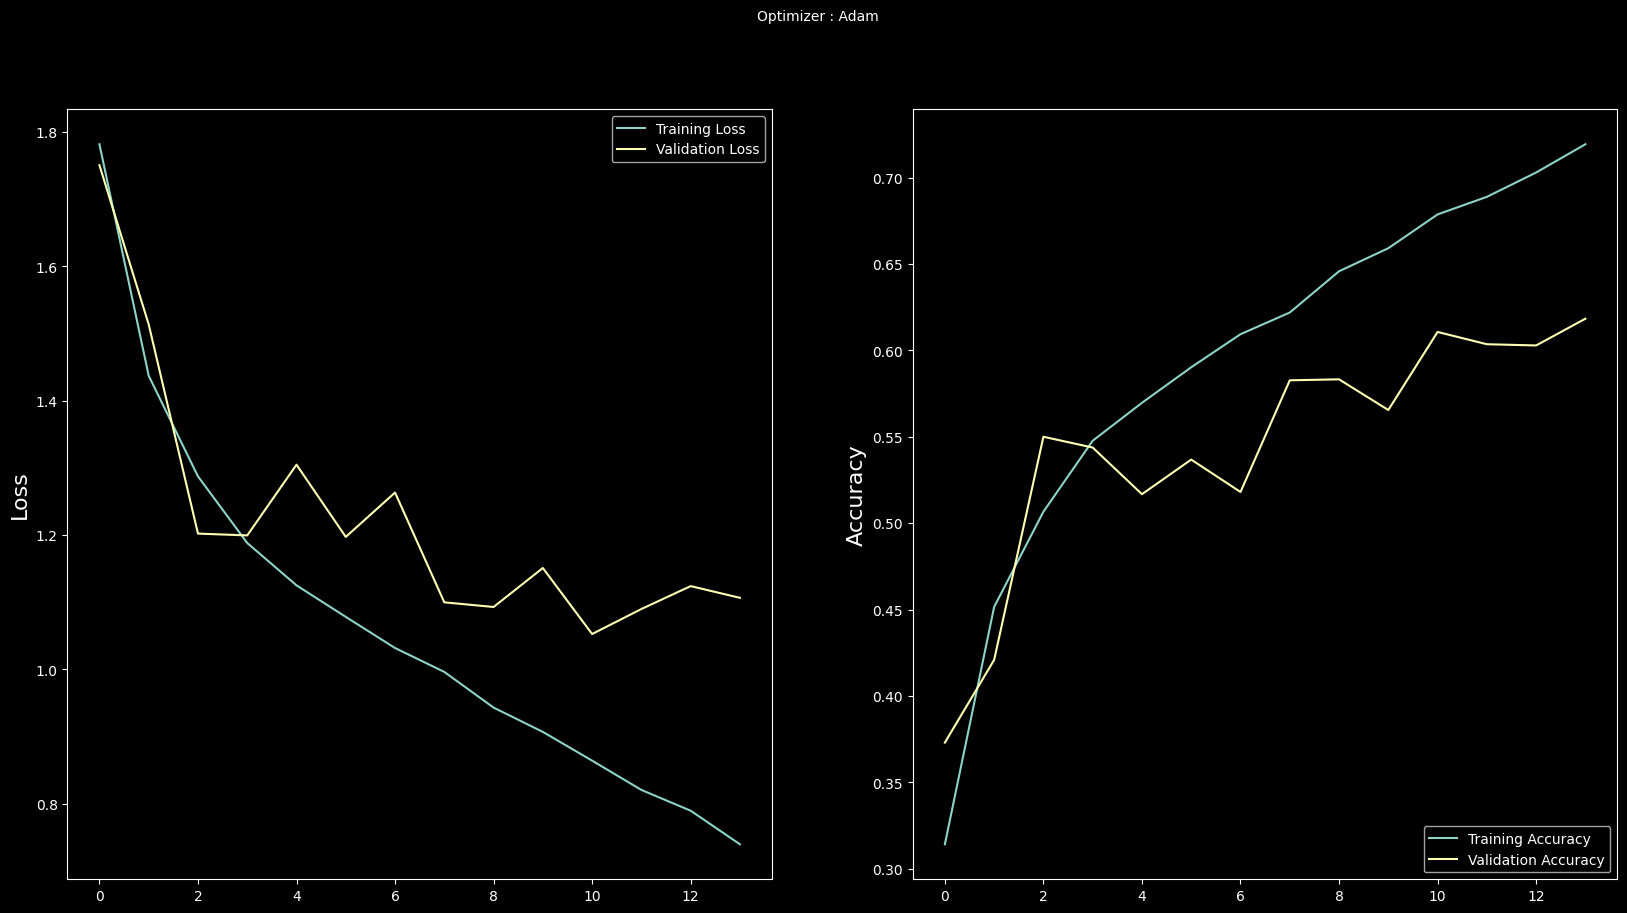

In [24]:
#plotting graph to check accuracy and loss
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()